## Framingham Heart Study EDA

Nick Ramirez, Rui Tongyu, Tianqi Zhou

MIT 6.862

## Importing Libraries

In [1]:
# Basic Libraries
import numpy                  as np  
import pandas                 as pd  
import seaborn                as sns 
import matplotlib.pyplot      as plt 

# Machine Learning Libraries
from sklearn.preprocessing    import StandardScaler 
from sklearn.model_selection  import train_test_split
from sklearn.metrics          import confusion_matrix, accuracy_score, classification_report
from sklearn                  import metrics

# Machine Learning Algorithms
from sklearn.linear_model     import LogisticRegression
from sklearn.linear_model     import SGDClassifier
from sklearn.neighbors        import KNeighborsClassifier
from sklearn.svm              import SVC
from sklearn.tree             import DecisionTreeClassifier
from sklearn.ensemble         import RandomForestClassifier

## Importing Data

In [2]:
# Make sure to include your filepath!
df = pd.read_csv('framingham.csv')
df.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

## EDA w/ Pandas Profiling

### Install Instructions:
Go to Terminal -> Paste in Code -> Run Lines Together:

pip install -U pandas-profiling[notebook]

jupyter nbextension enable --py widgetsnbextension

In [3]:
from pandas_profiling import ProfileReport

# Running the EDA
profile = ProfileReport(df, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/29 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Variable Types:
- #### Nominal
    - male: male = 1, female = 0
    - currentSmoker: yes = 1, no = 0
    - BPMeds: yes = 1, no = 0
    - prevalentStroke: yes = 1, no = 0
        - If the patient has a history of stroke(s)
    - prevalentHyp: yes = 1, no = 0
        - If the patient has a history of hypertension
    - diabetes: yes = 1, no = 0
    - TenYearChd: yes = 1, no = 0
        - Outcome of interest
    
 
- #### Ordinal
    - education: some high school = 1, high school/GED = 2, some college or vocational school = 3, college = 4
    
    
- #### Continuous
    - age(at exam time)
    - cigsPerDay (estimated average)
    - totChol (mg/dL)
        - Total cholesterol levels of each patient
    - sysBP (mm/Hg)
        - Normal is below 120; High is above 140
    - diaBP (mm/Hg)
        - Normal is below 80; High is above 90
    - BMI (kg/m^2)
    - heartRate (beats/min)
    - glucose (mg/dL)

### Variables w/ Missing Data

- cigsPerDay
- BPMeds
- totChol
- BMI
- glucose
- heartRate

In [5]:
# Total Number Missing
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

### Looking at Continuous Variables' Distribution

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

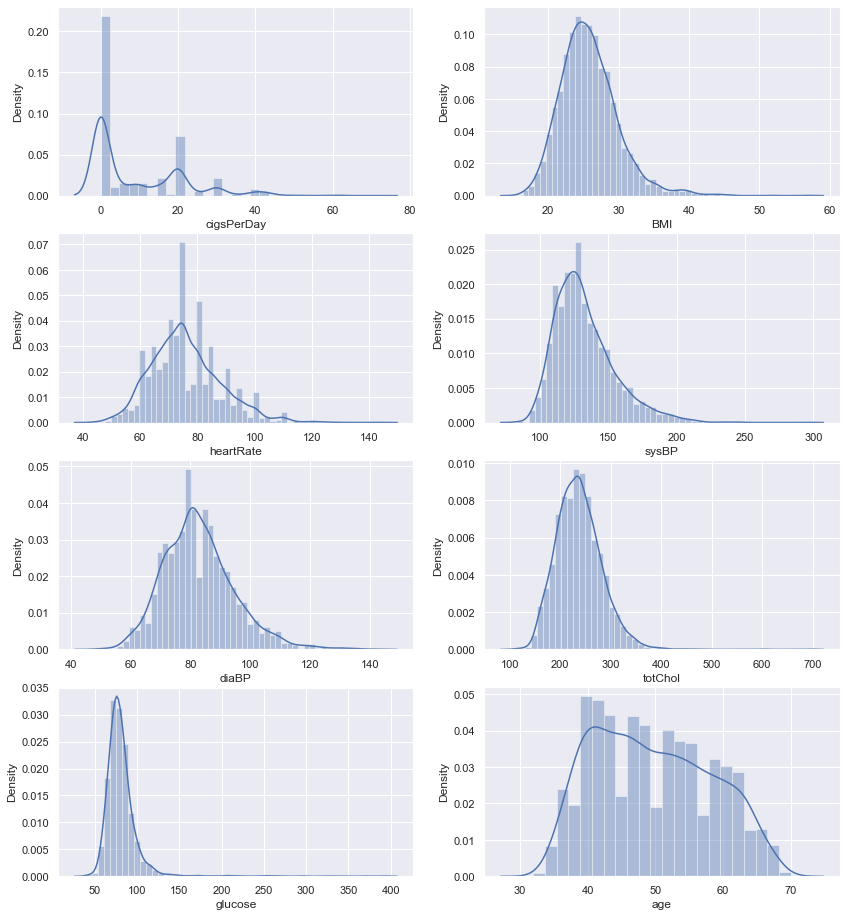

In [25]:
# Subsetting Continuous Variables
con_var = list(set(df.describe().columns)-set(['TenYearCHD', 
                                           'male', 
                                           'currentSmoker', 
                                           'BPMeds', 
                                           'prevalentStroke', 
                                           'prevalentHyp', 
                                           'diabetes',
                                           'education']))
con_var

# Creating Histograms
f, axes = plt.subplots(4, 2, figsize=(14,16))

index1 = 0
index2 = 0

for col in con_var:
    sns.distplot(df[col], ax=axes[index1][index2]);
    index2 = index2+1
    if index2==2:
        index2 = 0
        index1 = index1+1
plt.show()

### Looking for Outliers

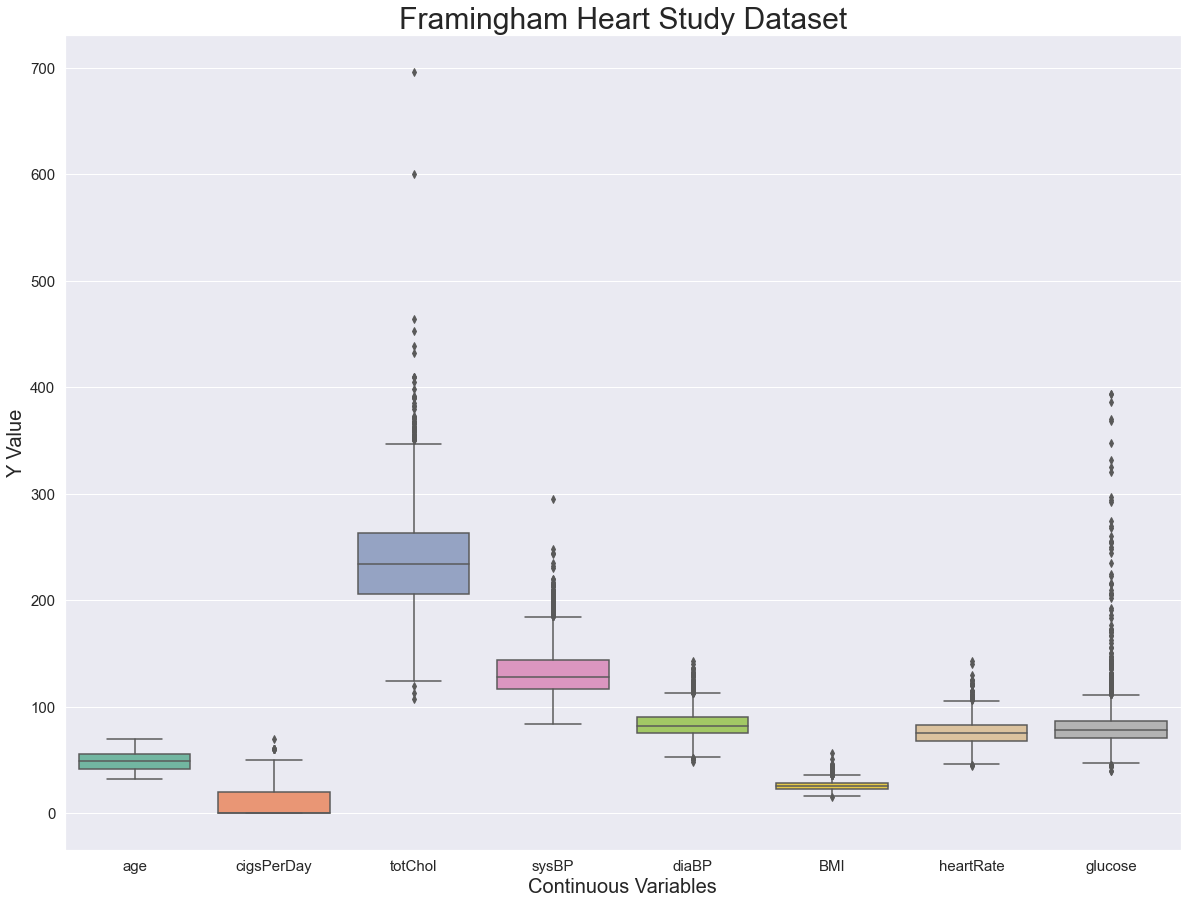

In [17]:
# Subsetting Continuous Variables
df_c = df[['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]

# Box and Whisker Plot
sns.set(rc={'figure.figsize':(20,15)})

bp = sns.boxplot(data=df_c, 
                      palette="Set2")
bp.axes.set_title("Framingham Heart Study Dataset", fontsize = 30)
bp.set_xlabel("Continuous Variables",fontsize=20)
bp.set_ylabel("Y Value",fontsize= 20)
bp.tick_params(labelsize=15)

### Looking at Continuous Variables vs. TenYearCHD

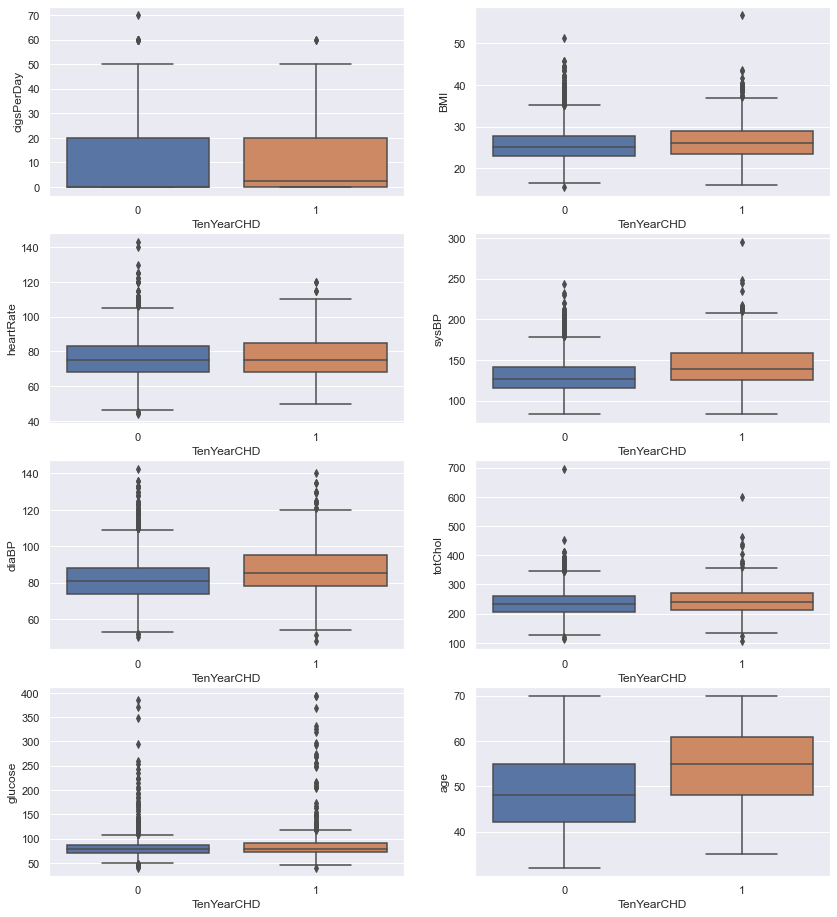

In [26]:
f, axes = plt.subplots(4, 2, figsize=(14, 16))

index1 = 0
index2 = 0

for col in list(con_var):
    sns.boxplot(y=col, x='TenYearCHD', data=df, ax=axes[index1][index2])
    
    index2 = index2+1
    if index2==2:
        index2 = 0
        index1 = index1+1
plt.show()